In [1]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os
from astropy.io import fits
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
source_name='Crab'
ra=83.633080
dec=22.014500
radius=5.
Tstart='2003-03-15T23:27:40.0'
Tstop='2018-03-16T00:03:15.0'
T_format='isot'
time_bin=10000
time_bin_format='sec'
E1_keV=30.
E2_keV=100.
E1_keV_1=100.
E2_keV_1=300.

instrument='isgri'
product='isgri_lc'
osa_version='OSA10.2'
osa_version11='OSA11.0'

host='https://www.astro.unige.ch/cdci/astrooda/dispatch-data/'



In [3]:
try: 
    input = raw_input
    token=input() # token for restricted access server
    cookies=dict(_oauth2_proxy=token)
except NameError: 
    print("using public server")

disp=DispatcherAPI(host=host)

using public server


In [4]:
T1_utc='2003-03-15T00:00:00.0'
T2_utc='2004-03-15T00:00:00.0'

data=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      T1=T1_utc,
                      T2=T2_utc,
                      E1_keV=E1_keV,
                      E2_keV=E2_keV,
                      osa_version='OSA10.2',
                      RA=ra,
                      DEC=dec,
                      detection_threshold=10,
                      product_type='Real')

waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data/
the job has been submitted on the remote server
 | the job is working remotely, please wait status=done - job_id=3563043515513838434 

query done succesfully!


In [5]:
data.dispatcher_catalog_1.table

meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str5,float64,float64,float64,int64,int64,int64,object
5,Crab,1714.5445556640625,83.63191986083984,22.016624450683594,-32768,2,0,0.0002800000074785203
23,NEW_1,19.953489303588867,82.86053466796875,32.58645248413086,-32767,0,0,None
24,NEW_2,17.920751571655273,94.97725677490234,22.308929443359375,-32767,0,0,None
25,NEW_3,12.553199768066406,72.25248718261719,21.064844131469727,-32767,0,0,None
27,NEW_5,10.980508804321289,89.33238220214844,22.148012161254883,-32767,0,0,None
30,NEW_8,10.10286808013916,82.81501770019531,35.44596481323242,-32767,0,0,None
67,Crab,196.03286743164062,83.63267517089844,22.01528549194336,-32768,2,0,0.0002800000074785203


In [6]:
FLAG=0
torm=[]
for ID,n in enumerate(data.dispatcher_catalog_1.table['src_names']):
    if(n[0:3]=='NEW'):
        torm.append(ID)
    if(n==source_name):
        FLAG=1
data.dispatcher_catalog_1.table.remove_rows(torm)
data.dispatcher_catalog_1.table.remove_rows(1)

nrows=len(data.dispatcher_catalog_1.table['src_names'])

In [7]:
api_cat=data.dispatcher_catalog_1.get_api_dictionary()

In [8]:
import numpy as np
for i in range(2003,2016):
    T1_utc=str(i)+'-03-15T00:00:00.0'
    T2_utc=str(i+1)+'-03-15T00:00:00.0'
    print(T1_utc,'-',T2_utc)
    #par_dict={'catalog_selected_objects': u'1,2,3,4', 
    #          'E1_keV': E1_keV, 'E2_keV': E2_keV, 
    #          'osa_version': osa_version, 'T_format': T_format, 'selected_catalog': catalog ,
    #          'T2': T2_utc, 'time_bin': time_bin, 'T1': T1_utc, 'product': product, 'instrument': instrument, 
    #          'radius': radius, 'RA': ra, 'src_name': src_name,  'DEC': dec, 'time_bin_format': time_bin_format}
    #data=disp.get_product(**par_dict)
    data=disp.get_product(instrument='isgri',
                        product='isgri_lc',
                        T1=T1_utc,
                        T2=T2_utc,
                        T_format=T_format,
                        E1_keV=E1_keV,
                        E2_keV=E2_keV,
                        query_type='Real',
                        osa_version='OSA10.2',
                        RA=ra,
                        DEC=dec,
                        product_type='Real',
                        time_bin=time_bin,
                        selected_catalog=api_cat)

    crab_lc=data._p_list[0]
    lc=crab_lc.data_unit[1].data
    if i==2003:
        t_30_100=lc['TIME']
        r_30_100=lc['RATE']
        err_30_100=lc['ERROR']
    else:
        t_30_100=np.concatenate((t_30_100,lc['TIME']))
        r_30_100=np.concatenate((r_30_100,lc['RATE']))
        err_30_100=np.concatenate((err_30_100,lc['ERROR']))

        

2003-03-15T00:00:00.0 - 2004-03-15T00:00:00.0
waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data/
the job has been submitted on the remote server
 - the job is working remotely, please wait status=done - job_id=2329765168680515968 5968 

query done succesfully!
2004-03-15T00:00:00.0 - 2005-03-15T00:00:00.0
waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data/
the job has been submitted on the remote server
 | the job is working remotely, please wait status=done - job_id=-4584007473554742716 2716 

query done succesfully!
2005-03-15T00:00:00.0 - 2006-03-15T00:00:00.0
waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data/
the job has been submitted on the remote server
 / the job is working remotely, please wait status=done - job_id=6019164778587010018 

query done succesfully!
2006-03-15T00:00:00.0 - 2007-03-15T00:00:00.

In [9]:
for i in range(2003,2016):
    T1_utc=str(i)+'-03-15T00:00:00.0'
    T2_utc=str(i+1)+'-03-15T00:00:00.0'
    print(T1_utc,'-',T2_utc)
    data=disp.get_product(instrument='isgri',
                        product='isgri_lc',
                        T1=T1_utc,
                        T2=T2_utc,
                        T_format=T_format,
                        E1_keV=E1_keV_1,
                        E2_keV=E2_keV_1,
                        query_type='Real',
                        osa_version='OSA10.2',
                        RA=ra,
                        DEC=dec,
                        product_type='Real',
                        time_bin=time_bin,
                        selected_catalog=api_cat)

    crab_lc=data._p_list[0]
    lc=crab_lc.data_unit[1].data
    if i==2003:
        t_100_300=lc['TIME']
        r_100_300=lc['RATE']
        err_100_300=lc['ERROR']
    else:
        t_100_300=np.concatenate((t_100_300,lc['TIME']))
        r_100_300=np.concatenate((r_100_300,lc['RATE']))
        err_100_300=np.concatenate((err_100_300,lc['ERROR']))



2003-03-15T00:00:00.0 - 2004-03-15T00:00:00.0
waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data/
the job has been submitted on the remote server
 / the job is working remotely, please wait status=done - job_id=-4917558247308569385 9385 

query done succesfully!
2004-03-15T00:00:00.0 - 2005-03-15T00:00:00.0
waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data/
the job has been submitted on the remote server
 \ the job is working remotely, please wait status=done - job_id=-1849292393885914615 4615 

query done succesfully!
2005-03-15T00:00:00.0 - 2006-03-15T00:00:00.0
waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data/
the job has been submitted on the remote server
 / the job is working remotely, please wait status=done - job_id=-2129055670707253431 3431 

query done succesfully!
2006-03-15T00:00:00.0 - 2007-03-15T00

In [10]:
for i in range(2016,2018):
    T1_utc=str(i)+'-03-15T00:00:00.0'
    T2_utc=str(i+1)+'-03-15T00:00:00.0'
    print(T1_utc,'-',T2_utc)
    #par_dict={'catalog_selected_objects': u'1,2,3,4', 'E1_keV': E1_keV_1, 'E2_keV': E2_keV_1, 'osa_version': osa_version11, 'T_format': T_format, 'selected_catalog': catalog , 'T2': T2_utc, 'time_bin': time_bin, 'T1': T1_utc, 'product': product, 'instrument': instrument, 'radius': radius, 'RA': ra, 'src_name': src_name,  'DEC': dec, 'time_bin_format': time_bin_format}
    #data=disp.get_product(**par_dict)
    data=disp.get_product(instrument='isgri',
                        product='isgri_lc',
                        T1=T1_utc,
                        T2=T2_utc,
                        T_format=T_format,
                        E1_keV=E1_keV_1,
                        E2_keV=E2_keV_1,
                        query_type='Real',
                        osa_version='OSA11.0',
                        RA=ra,
                        DEC=dec,
                        product_type='Real',
                        time_bin=time_bin,
                        selected_catalog=api_cat)

    crab_lc=data._p_list[0]
    lc=crab_lc.data_unit[1].data
    if i==2016:
        t_100_300_osa11=lc['TIME']
        r_100_300_osa11=lc['RATE']
        err_100_300_osa11=lc['ERROR']
    else:
        t_100_300_osa11=np.concatenate((t_100_300_osa11,lc['TIME']))
        r_100_300_osa11=np.concatenate((r_100_300_osa11,lc['RATE']))
        err_100_300_osa11=np.concatenate((err_100_300_osa11,lc['ERROR']))



2016-03-15T00:00:00.0 - 2017-03-15T00:00:00.0
waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data/
the job has been submitted on the remote server
 / the job is working remotely, please wait status=done - job_id=-1367690008522616162 

query done succesfully!
2017-03-15T00:00:00.0 - 2018-03-15T00:00:00.0
waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data/
the job has been submitted on the remote server
 - the job is working remotely, please wait status=done - job_id=-1566348618621423034 

query done succesfully!


In [11]:
for i in range(2016,2018):
    T1_utc=str(i)+'-03-15T00:00:00.0'
    T2_utc=str(i+1)+'-03-15T00:00:00.0'
    print(T1_utc,'-',T2_utc)
    data=disp.get_product(instrument='isgri',
                        product='isgri_lc',
                        T1=T1_utc,
                        T2=T2_utc,
                        T_format=T_format,
                        E1_keV=E1_keV,
                        E2_keV=E2_keV,
                        query_type='Real',
                        osa_version='OSA11.0',
                        RA=ra,
                        DEC=dec,
                        product_type='Real',
                        time_bin=time_bin,
                        selected_catalog=api_cat)

    crab_lc=data._p_list[0]
    lc=crab_lc.data_unit[1].data
    if i==2016:
        t_30_100_osa11=lc['TIME']
        r_30_100_osa11=lc['RATE']
        err_30_100_osa11=lc['ERROR']
    else:
        t_30_100_osa11=np.concatenate((t_30_100_osa11,lc['TIME']))
        r_30_100_osa11=np.concatenate((r_30_100_osa11,lc['RATE']))
        err_30_100_osa11=np.concatenate((err_30_100_osa11,lc['ERROR']))



2016-03-15T00:00:00.0 - 2017-03-15T00:00:00.0
waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data/
the job has been submitted on the remote server
 \ the job is working remotely, please wait status=done - job_id=-6700860237731893607 

query done succesfully!
2017-03-15T00:00:00.0 - 2018-03-15T00:00:00.0
waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data/
the job has been submitted on the remote server
 | the job is working remotely, please wait status=done - job_id=-1483695660621284673 

query done succesfully!


In [12]:
T1_2osa_utc="2016-01-01T00:00:00"
T2_2osa_utc="2017-01-01T00:00:00"

spec_data_osa10=disp.get_product(instrument='isgri',
                    product='isgri_spectrum',
                    T1=T1_2osa_utc,
                    T2=T2_2osa_utc,
                    query_type='Real',
                    osa_version='OSA10.2',
                    RA=ra,
                    DEC=dec,
                    product_type='Real',
                    selected_catalog=api_cat)

spec_data_osa11=disp.get_product(instrument='isgri',
                    product='isgri_spectrum',
                    T1=T1_2osa_utc,
                    T2=T2_2osa_utc,
                    query_type='Real',
                    osa_version='OSA11.0',
                    RA=ra,
                    DEC=dec,
                    product_type='Real',
                    selected_catalog=api_cat)
spec_data_osa10, spec_data_osa11

waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data/


query done succesfully!
waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data/


query done succesfully!


(<oda_api.api.DataCollection at 0x7f1088543160>,
 <oda_api.api.DataCollection at 0x7f104fb197f0>)

--> NAME PRIMARY
--> NAME GROUPING
--> NAME SPECRESP MATRIX
--> NAME EBOUNDS
--> NAME PRIMARY
--> NAME GROUPING
--> NAME SPECRESP MATRIX
--> NAME EBOUNDS
response norm in 30 100 is 130.25804 rate norm 116.88793
--> NAME PRIMARY
--> NAME EBOUNDS
--> NAME SPECRESP MATRIX
--> NAME PRIMARY
--> NAME EBOUNDS
--> NAME SPECRESP MATRIX
response norm in 30 100 is 221.86757 rate norm 215.04788


221.86757

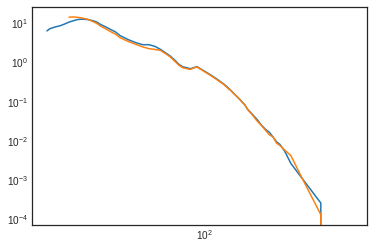

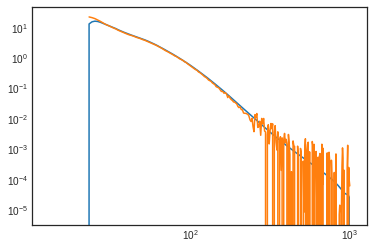

In [20]:
# for details see https://doi.org/10.5281/zenodo.3667772  (https://github.com/volodymyrss/integral-isgri-rate-meaning/tree/v0.1.1) 

# Roques & Jourdain 2018
def crab_ph_cm2_s_kev(en):
    K=7.417e-4
    al1=-1.98
    al2=-2.33
    Ec=500.
    f=K*(en/100)**al1*(np.exp(-en/Ec))
    m=en>Ec*(al1-al2)
    f[m]=(K*((al1-al2)*Ec/100)**(al1-al2)*(en/100)**al2*np.exp(-(al1-al2)))[m]

    return f

def resp_norm(D, e1, e2, plot=False):
    arf=D._4.data_unit[1].data
    rmf_eb=D._5.get_data_unit_by_name('EBOUNDS').data
    rmf_mt=D._5.get_data_unit_by_name('SPECRESP MATRIX').data
    spec=D._3.data_unit[1]
    
    crab_ph_cm2_s_kev    
    ie1=arf['ENERG_LO']
    ie2=arf['ENERG_HI']
    
    source=crab_ph_cm2_s_kev(ie1)
    
    csource=np.outer(arf['SPECRESP']*source*(ie2-ie1),np.ones_like(rmf_eb['E_MIN']))*rmf_mt['MATRIX']
        
    
    if plot:
        plt.figure()
        plt.plot(
            rmf_eb['E_MIN'],
            csource.sum(0)/(rmf_eb['E_MAX']-rmf_eb['E_MIN'])
        )
        
        plt.plot(
            rmf_eb['E_MIN'],
            spec.data['RATE']/(rmf_eb['E_MAX']-rmf_eb['E_MIN'])
        )
        
        plt.loglog()

    rate_n = spec.data['RATE'][(rmf_eb['E_MIN']>e1) & (rmf_eb['E_MAX']<e2)].sum()

    n = csource[:,(rmf_eb['E_MIN']>e1) & (rmf_eb['E_MAX']<e2)].sum()
    print("response norm in", e1,e2,"is",n, "rate norm", rate_n)

    return n


   
    
resp_norm(spec_data_osa10, 30, 100, plot=True)
resp_norm(spec_data_osa11, 30, 100, plot=True)


In [16]:
from numpy import sqrt,exp
Nbins=30
time=np.linspace(52800,58300,Nbins)
flux_bat=np.zeros(Nbins)
error_bat=np.zeros(Nbins)

dtime=time[1]-time[0]
time_av=time-dtime/2.
j=0

d=np.genfromtxt('Crab_SWIFT_BAT.dat')
tt=d[:,0]
r=d[:,1]
rerr=d[:,2]
k=0
while (j<len(time)):
    while ((tt[k]<time[j])):
        if rerr[k]>0:
            flux_bat[j]=flux_bat[j]+r[k]/(rerr[k])**2
            error_bat[j]=error_bat[j]+1./(rerr[k])**2
        k=k+1
        if (k==len(tt)):
            break
    
    if (k==len(tt)):
        break
    else:
        j=j+1
for i in range(len(flux_bat)):
    if(error_bat[i]>0.):
        flux_bat[i]=flux_bat[i]/(error_bat[i])
        error_bat[i]=1./sqrt(error_bat[i])
sc_bat=max(flux_bat)



In [17]:
mc=r<0.1
mc&=r>0
tt[mc],r[mc],rerr[mc]

(array([56923., 57454.]),
 array([0.03701819, 0.02633173]),
 array([0.00817971, 0.00115728]))

In [18]:
time=np.linspace(52800,58300,Nbins)
flux25=np.zeros(Nbins)
error25=np.zeros(Nbins)
flux50=np.zeros(Nbins)
error50=np.zeros(Nbins)
flux100=np.zeros(Nbins)
error100=np.zeros(Nbins)

dtime=time[1]-time[0]
time_av=time-dtime/2.
j=0

d=np.genfromtxt('CRAB_GBM_occ_fluxhist_auto.txt')
t1=d[:,0]
t2=d[:,1]
f25=d[:,4]
ferr25=d[:,5]
f50=d[:,6]
ferr50=d[:,7]
f100=d[:,8]
ferr100=d[:,9]
tt=(t1+t2)/2.
k=0
while (j<len(time)):
    while ((tt[k]<time[j])):
        flux25[j]=flux25[j]+f25[k]/(ferr25[k])**2
        error25[j]=error25[j]+1./(ferr25[k])**2
        flux50[j]=flux50[j]+f50[k]/(ferr50[k])**2
        error50[j]=error50[j]+1./(ferr50[k])**2
        flux100[j]=flux100[j]+f100[k]/(ferr100[k])**2
        error100[j]=error100[j]+1./(ferr100[k])**2
        k=k+1
        if (k==len(tt)):
            break
    if (k==len(tt)):
        break
    else:
        j=j+1
for i in range(len(flux25)):
    if(error25[i]>0.):
        flux25[i]=flux25[i]/(error25[i])
        error25[i]=1./sqrt(error25[i])
    if(error50[i]>0.):
        flux50[i]=flux50[i]/(error50[i])
        error50[i]=1./sqrt(error50[i])
    if(error100[i]>0.):
        flux100[i]=flux100[i]/(error100[i])
        error100[i]=1./sqrt(error100[i])

sc_gbm25=max(flux25)
sc_gbm50=max(flux50)
sc_gbm100=max(flux100)




--> NAME PRIMARY
--> NAME GROUPING
--> NAME SPECRESP MATRIX
--> NAME EBOUNDS
--> NAME PRIMARY
--> NAME GROUPING
--> NAME SPECRESP MATRIX
--> NAME EBOUNDS
response norm in 30 100 is 130.25804 rate norm 116.88793
--> NAME PRIMARY
--> NAME GROUPING
--> NAME SPECRESP MATRIX
--> NAME EBOUNDS
--> NAME PRIMARY
--> NAME GROUPING
--> NAME SPECRESP MATRIX
--> NAME EBOUNDS
response norm in 30 100 is 130.25804 rate norm 116.88793
--> NAME PRIMARY
--> NAME EBOUNDS
--> NAME SPECRESP MATRIX
--> NAME PRIMARY
--> NAME EBOUNDS
--> NAME SPECRESP MATRIX
response norm in 30 100 is 221.86757 rate norm 215.04788
--> NAME PRIMARY
--> NAME GROUPING
--> NAME SPECRESP MATRIX
--> NAME EBOUNDS
--> NAME PRIMARY
--> NAME GROUPING
--> NAME SPECRESP MATRIX
--> NAME EBOUNDS
response norm in 100 300 is 23.046906 rate norm 22.374516
--> NAME PRIMARY
--> NAME GROUPING
--> NAME SPECRESP MATRIX
--> NAME EBOUNDS
--> NAME PRIMARY
--> NAME GROUPING
--> NAME SPECRESP MATRIX
--> NAME EBOUNDS
response norm in 100 300 is 23.046906

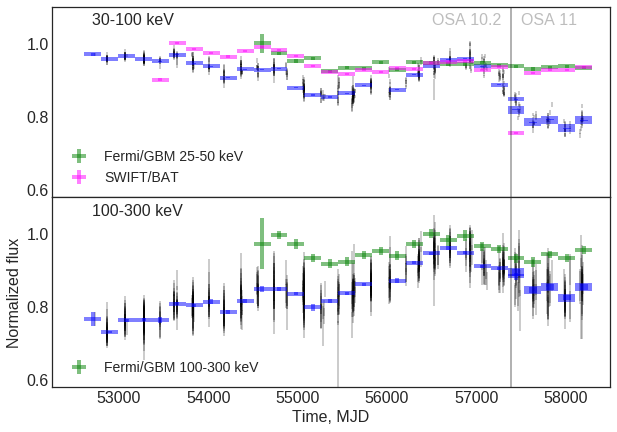

In [19]:
mpl.style.use('seaborn-white')

plt.rcParams.update({
            'legend.fontsize': 14,
            'legend.handlelength': 2
        })

t0=51544

from numpy import exp
flux=np.zeros(Nbins)
error=np.zeros(Nbins)
dtime=time[1]-time[0]
time_av=time-dtime/2.

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212,sharex=ax1, sharey=ax1)
#ax3 = fig.add_subplot(313,sharex=ax1, sharey=ax1)
fig.subplots_adjust(hspace=0)


j=0
k=0
while (j<len(time)):
    while ((t_30_100[k]+t0<time[j])):
        flux[j]=flux[j]+r_30_100[k]/(err_30_100[k])**2
        error[j]=error[j]+1./(err_30_100[k])**2
        k=k+1
        if (k==len(t_30_100)):
            break
    if (k==len(t_30_100)):
        break
    else:
        j=j+1
for i in range(len(flux)):
    if(error[i]>0.):
        flux[i]=flux[i]/(error[i])
        error[i]=1./sqrt(error[i])
        
overall_norm_30_100=np.max(r_30_100)/resp_norm(spec_data_osa10, 30, 100)

sc=overall_norm_30_100*resp_norm(spec_data_osa10, 30, 100)

ax1.errorbar(t_30_100+t0,r_30_100/sc,yerr=err_30_100/sc,linestyle='none',color='black',alpha=0.2,linewidth=2)
ax1.errorbar(time_av[:-4],flux[:-4]/sc,yerr=error[:-4]/sc,xerr=dtime/2.,linestyle='none',color='blue',linewidth=4,alpha=0.5)


flux=np.zeros(Nbins)
error=np.zeros(Nbins)
j=0
k=0
while (j<len(time)):
    while ((t_30_100_osa11[k]+t0<time[j])):
        flux[j]=flux[j]+r_30_100_osa11[k]/(err_30_100_osa11[k])**2
        error[j]=error[j]+1./(err_30_100_osa11[k])**2
        k=k+1
        if (k==len(t_30_100_osa11)):
            break
    if (k==len(t_30_100_osa11)):
        break
    else:
        j=j+1
for i in range(len(flux)):
    if(error[i]>0.):
        flux[i]=flux[i]/(error[i])
        error[i]=1./sqrt(error[i])
        
sc=overall_norm_30_100*resp_norm(spec_data_osa11, 30, 100)

ax1.errorbar(t_30_100_osa11+t0,r_30_100_osa11/sc,yerr=err_30_100_osa11/sc,linestyle='none',color='black',alpha=0.2,linewidth=2)
ax1.errorbar(time_av,flux/sc,yerr=error/sc,xerr=dtime/2.,linestyle='none',color='blue',linewidth=8,alpha=0.5)

j=0
k=0
flux=np.zeros(Nbins)
error=np.zeros(Nbins)
while (j<len(time)):
    while ((t_100_300[k]+t0<time[j])):
        flux[j]=flux[j]+r_100_300[k]/(err_100_300[k])**2
        error[j]=error[j]+1./(err_100_300[k])**2
        k=k+1
        if (k==len(t_100_300)):
            break
    if (k==len(t_100_300)):
        break
    else:
        j=j+1
for i in range(len(flux)):
    if(error[i]>0.):
        flux[i]=flux[i]/(error[i])
        error[i]=1./sqrt(error[i])
        
overall_norm_100_300=np.max(r_100_300)/resp_norm(spec_data_osa10, 100, 300)

sc=overall_norm_100_300*resp_norm(spec_data_osa10, 100, 300)

ax2.errorbar(t_100_300+t0,r_100_300/sc,yerr=err_100_300/sc,linestyle='none',color='black',alpha=0.2,linewidth=2)
ax2.errorbar(time_av[:-4],flux[:-4]/sc,yerr=error[:-4]/sc,xerr=dtime/2.,linestyle='none',color='blue',linewidth=4,alpha=0.5)
j=0
k=0
flux=np.zeros(Nbins)
error=np.zeros(Nbins)
while (j<len(time)):
    while ((t_100_300_osa11[k]+t0<time[j])):
        flux[j]=flux[j]+r_100_300_osa11[k]/(err_100_300_osa11[k])**2
        error[j]=error[j]+1./(err_100_300_osa11[k])**2
        k=k+1
        if (k==len(t_100_300_osa11)):
            break
    if (k==len(t_100_300_osa11)):
        break
    else:
        j=j+1
for i in range(len(flux)):
    if(error[i]>0.):
        flux[i]=flux[i]/(error[i])
        error[i]=1./sqrt(error[i])
        
        
sc=overall_norm_100_300*resp_norm(spec_data_osa11, 100, 300)

ax2.errorbar(t_100_300_osa11+t0,r_100_300_osa11/sc,yerr=err_100_300_osa11/sc,linestyle='none',color='black',alpha=0.2,linewidth=2)
ax2.errorbar(time_av,flux/sc,yerr=error/sc,xerr=dtime/2.,linestyle='none',color='blue',linewidth=8,alpha=0.5)


ax1.errorbar(time_av,1.*flux25/sc_gbm25,yerr=error25/sc_gbm25,xerr=dtime/2.,linestyle='none',color='green',alpha=0.5,linewidth=4,label='Fermi/GBM 25-50 keV')
ax1.errorbar(time_av,1.*flux_bat/sc_bat,yerr=error_bat/sc_bat,xerr=dtime/2.,linestyle='none',color='magenta',alpha=0.5,linewidth=4,label='SWIFT/BAT')
ax2.errorbar(time_av,flux100/sc_gbm100,yerr=error100/sc_gbm100,xerr=dtime/2.,linestyle='none',color='green',alpha=0.5,linewidth=4,label='Fermi/GBM 100-300 keV')

plt.ylim(0.58,1.10)
plt.xlim(52250,58500)
ax1.set_ylim(0.58,1.10)


ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)
#ax1.set_yticks(np.linspace(0.5,1.2,8))

ax1.axvline(57357+31,color='black',linewidth=2,alpha=0.3)
ax2.axvline(57357+31,color='black',linewidth=2,alpha=0.3)
ax1.text(56500,1.05,'OSA 10.2',fontsize=16,alpha=0.3)
ax1.text(57500,1.05,'OSA 11',fontsize=16,alpha=0.3)

ax1.text(52700,1.05,'30-100 keV',fontsize=16)
ax2.text(52700,1.05,'100-300 keV',fontsize=16)



ax1.legend(loc='lower left')
ax2.legend(loc='lower left')

plt.xlabel('Time, MJD',fontsize=16)
plt.ylabel('Normalized flux',fontsize=16)
plt.savefig('Crab_lc_evolution.pdf',format='pdf',dpi=100)

